<a href="https://colab.research.google.com/github/yuting-tseng/stock_predict/blob/master/stock_GOOGL_201901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finance Predict

ref: 
1. [ML預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)
2. [stock module github](https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker)

[GOOGL yahoo finance](https://query1.finance.yahoo.com/v7/finance/download/GOOGL?period1=1092844800&period2=1548172800&interval=1d&events=history&crumb=y4YbXJ6i6NJ)

In [0]:
# !git clone https://github.com/koreal6803/Stocker.git
# !pip install -r Stocker/requirements.txt

In [0]:
import warnings
import pandas as pd
from Stocker.stocker import Stocker
import pandas_datareader.data as web

warnings.filterwarnings('ignore')

In [8]:
# df = web.DataReader('GOOGL', 'stooq')
# price = df['Close'].squeeze().iloc[::-1

df = web.DataReader('GOOGL', 'yahoo')
price = df['Adj Close'].squeeze()
price.head()

Date
2010-01-04    313.688690
2010-01-05    312.307312
2010-01-06    304.434448
2010-01-07    297.347351
2010-01-08    301.311310
Name: Adj Close, dtype: float64

In [3]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2010-01-04 00:00:00 to 2019-01-23 00:00:00.


Predicted Price on 2019-04-23 00:00:00 = $974.08


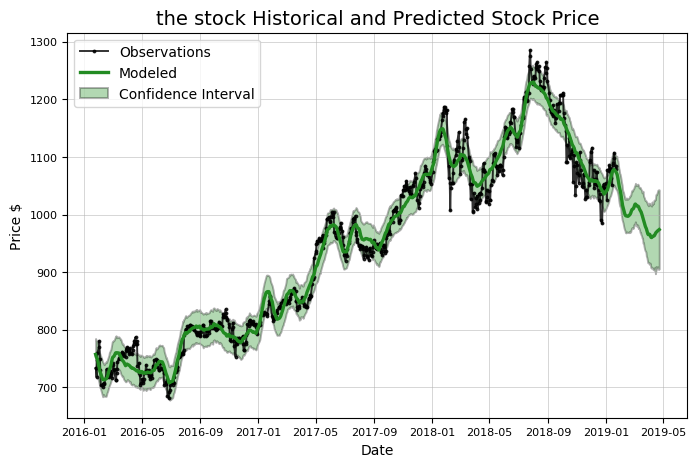

In [4]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2018-01-23 00:00:00 to 2019-01-23 00:00:00.

Predicted price on 2019-01-22 00:00:00 = $1360.05.
Actual price on    2019-01-22 00:00:00 = $1078.63.

Average Absolute Error on Training Data = $16.74.
Average Absolute Error on Testing  Data = $108.22.

When the model predicted an increase, the price increased 48.54% of the time.
When the model predicted a  decrease, the price decreased  50.63% of the time.

The actual value was within the 80% confidence interval 71.71% of the time.


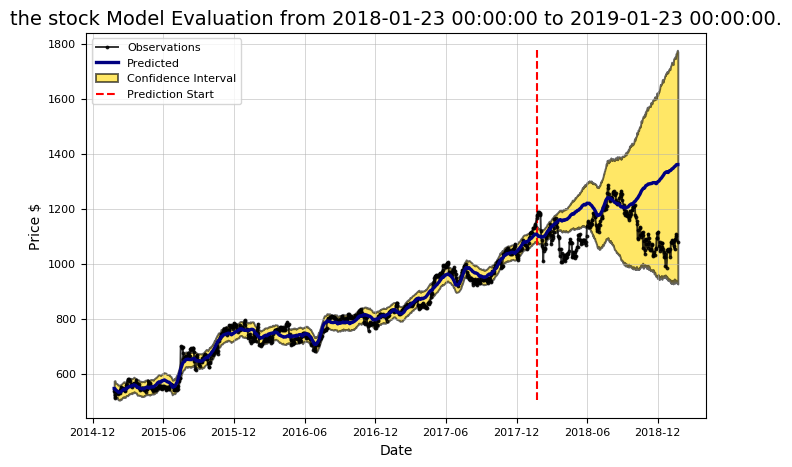

In [5]:
tsmc.evaluate_prediction(end_date=None)

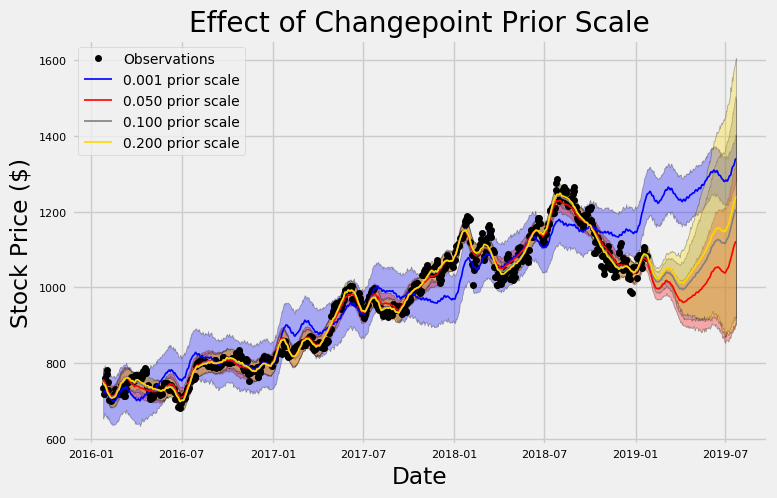

In [6]:
# 我們可以調整短中長期的參數，讓它預測短中長期股價
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Prediction Range: 2018-01-23 00:00:00 to 2019-01-23 00:00:00.

Predicted price on 2019-01-22 00:00:00 = $1271.51.
Actual price on    2019-01-22 00:00:00 = $1078.63.

Average Absolute Error on Training Data = $11.16.
Average Absolute Error on Testing  Data = $101.15.

When the model predicted an increase, the price increased 50.34% of the time.
When the model predicted a  decrease, the price decreased  53.40% of the time.

The actual value was within the 80% confidence interval 79.28% of the time.


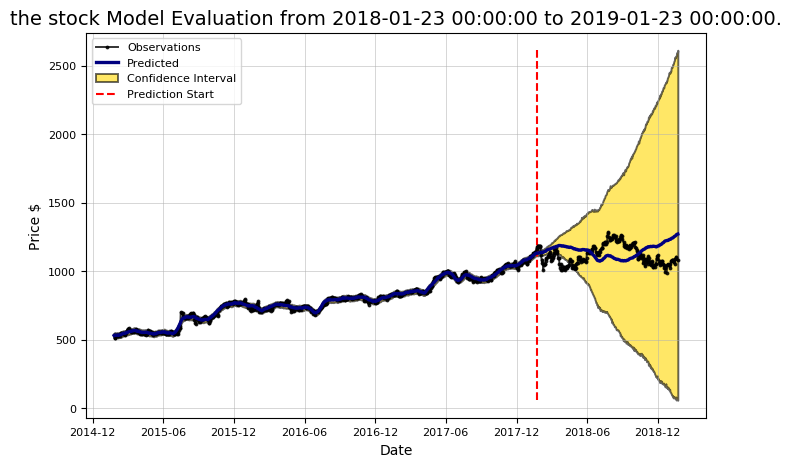

In [7]:
# 我們藉由上述的參數枚舉，可以知道哪一個參數（changepoint_prior）是最好的 我們可以藉由執行predict_future 來預測股價
tsmc.evaluate_prediction()